In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as no

In [2]:
df = pd.read_csv("Wprld population growth rate by cities 2024.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [3]:
df.head()

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [4]:
df.isna().sum()

City                  0
Country               0
Continent            11
Population (2024)     0
Population (2023)     0
Growth Rate           0
dtype: int64

In [5]:
df.describe()

,Population (2024),Population (2023),Growth Rate
count,8.010000e+02,8.010000e+02,801.000000
mean,2.654327e+06,2.604461e+06,0.020051
std,3.723253e+06,3.661201e+06,0.012180
min,7.500360e+05,7.228360e+05,-0.024900
25%,9.909310e+05,9.698040e+05,0.012200
50%,1.379368e+06,1.363510e+06,0.019700
75%,2.570980e+06,2.514077e+06,0.026600
max,3.711504e+07,3.719410e+07,0.058200


In [6]:
rows_with_nulls = df[df.isnull().any(axis=1)]

rows_with_nulls

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
133,Santo Domingo,Dominican Republic,NaN,3587402,3523890,0.0180
146,Ouagadougou,Burkina Faso,NaN,3358934,3203923,0.0484
184,Manchester,United Kingdom,NaN,2811756,2791005,0.0074
187,Brazzaville,Republic of the Congo,NaN,2724566,2637733,0.0329
313,Glasgow,United Kingdom,NaN,1708147,1698088,0.0059
400,Pointe Noire,Republic of the Congo,NaN,1379368,1336387,0.0322
424,Prague,Czech Republic,NaN,1327947,1323339,0.0035
604,Bangui,Central African Republic,NaN,985965,958335,0.0288
628,Southampton,United Kingdom,NaN,959202,951531,0.0081
718,Newcastle Upon Tyne,United Kingdom,NaN,828712,823431,0.0064


In [7]:
country_to_continent = {
    "Dominican Republic": "North America",
    "Burkina Faso": "Africa",
    "United Kingdom": "Europe",
    "Republic of the Congo": "Africa",
    "Czech Republic": "Europe",
    "Central African Republic": "Africa"
}

In [8]:
df.loc[df['Continent'].isna(), 'Continent'] = df['Country'].map(country_to_continent)

In [9]:
df.isna().sum()

City                 0
Country              0
Continent            0
Population (2024)    0
Population (2023)    0
Growth Rate          0
dtype: int64

In [10]:
east_african_countries = ["Kenya", "Tanzania", "Uganda", "Ethiopia", "Somalia", "Djibouti", "Rwanda", "Burundi", "South Sudan", "Eritrea"]

In [11]:
east_africa_df = df[df['Country'].isin(east_african_countries)]
east_africa_df

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
47,Dar Es Salaam,Tanzania,Africa,8161231,7775865,0.0496
71,Addis Ababa,Ethiopia,Africa,5703628,5460591,0.0445
74,Nairobi,Kenya,Africa,5541172,5325160,0.0406
113,Kampala,Uganda,Africa,4050826,3846102,0.0532
186,Mogadishu,Somalia,Africa,2726815,2610483,0.0446
365,Mombasa,Kenya,Africa,1495223,1440396,0.0381
403,Mwanza,Tanzania,Africa,1378014,1310754,0.0513
444,Kigali,Rwanda,Africa,1287952,1247551,0.0324
451,Bujumbura,Burundi,Africa,1277050,1206767,0.0582
496,Hargeysa,Somalia,Africa,1176617,1127198,0.0438


In [12]:
ea_population = east_africa_df.groupby('Country')['Population (2024)'].sum()
ea_population

Country
Burundi      1277050
Eritrea      1111748
Ethiopia     5703628
Kenya        7036395
Rwanda       1287952
Somalia      4696977
Tanzania    10375095
Uganda       4050826
Name: Population (2024), dtype: int64

In [13]:
ea_avg_growth_rate = east_africa_df.groupby('Country')['Growth Rate'].mean()
ea_avg_growth_rate

Country
Burundi     0.058200
Eritrea     0.036400
Ethiopia    0.044500
Kenya       0.039350
Rwanda      0.032400
Somalia     0.044133
Tanzania    0.048567
Uganda      0.053200
Name: Growth Rate, dtype: float64

In [14]:
top_5_ea_cities = east_africa_df.nlargest(5, 'Population (2024)')[['City', 'Population (2024)']]


In [15]:
top_5_ea_cities

,City,Population (2024)
47,Dar Es Salaam,8161231
71,Addis Ababa,5703628
74,Nairobi,5541172
113,Kampala,4050826
186,Mogadishu,2726815


In [16]:
east_africa_df

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
47,Dar Es Salaam,Tanzania,Africa,8161231,7775865,0.0496
71,Addis Ababa,Ethiopia,Africa,5703628,5460591,0.0445
74,Nairobi,Kenya,Africa,5541172,5325160,0.0406
113,Kampala,Uganda,Africa,4050826,3846102,0.0532
186,Mogadishu,Somalia,Africa,2726815,2610483,0.0446
365,Mombasa,Kenya,Africa,1495223,1440396,0.0381
403,Mwanza,Tanzania,Africa,1378014,1310754,0.0513
444,Kigali,Rwanda,Africa,1287952,1247551,0.0324
451,Bujumbura,Burundi,Africa,1277050,1206767,0.0582
496,Hargeysa,Somalia,Africa,1176617,1127198,0.0438


In [17]:
country_population = east_africa_df.groupby('Country')['Population (2024)'].sum()

country_population

Country
Burundi      1277050
Eritrea      1111748
Ethiopia     5703628
Kenya        7036395
Rwanda       1287952
Somalia      4696977
Tanzania    10375095
Uganda       4050826
Name: Population (2024), dtype: int64

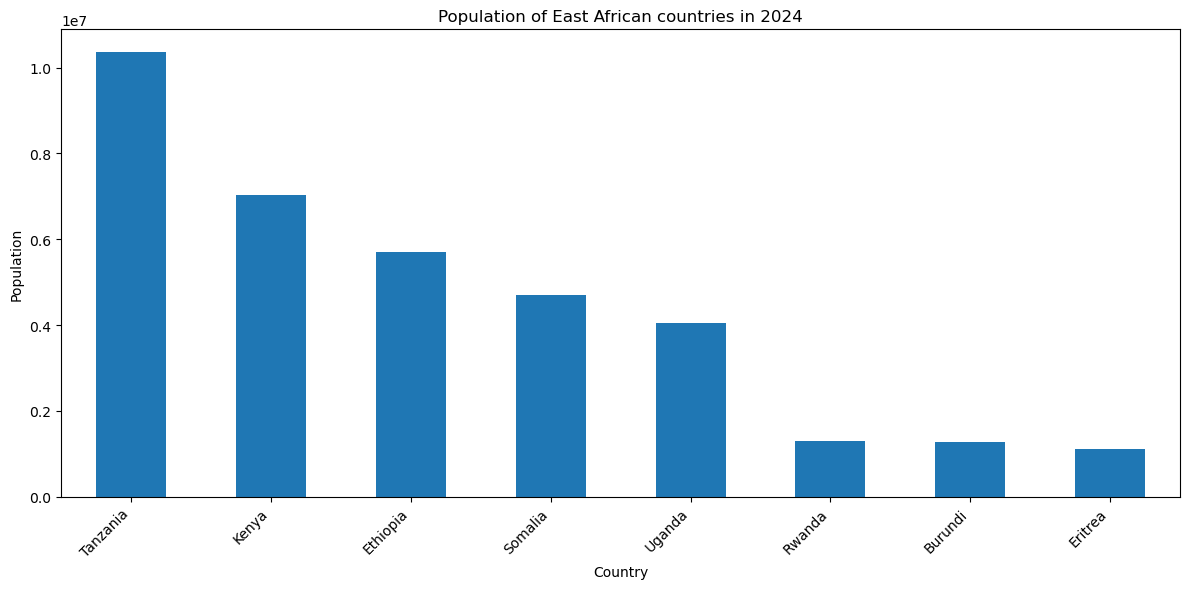

In [18]:
plt.figure(figsize=(12, 6))
country_population.sort_values(ascending=False).plot(kind='bar')
plt.title('Population of East African countries in 2024')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

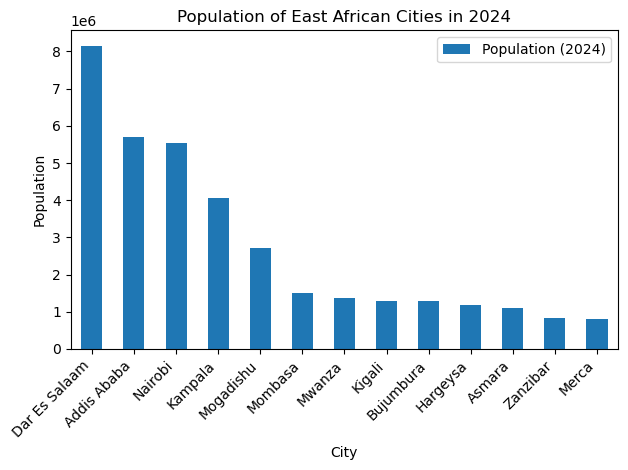

In [19]:
plt.figure(figsize=(12, 6))
east_africa_df.sort_values('Population (2024)', ascending=False).plot(x='City', y='Population (2024)', kind='bar')
plt.title('Population of East African Cities in 2024')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

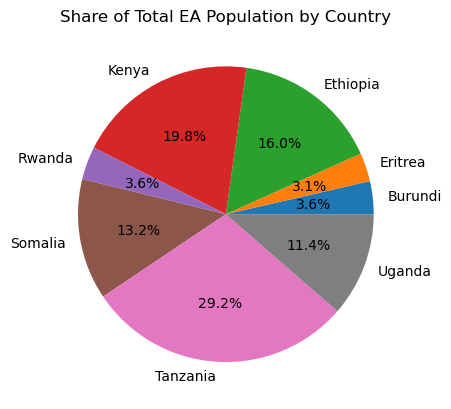

In [20]:
plt.pie(ea_population, labels=ea_population.index, autopct='%1.1f%%')
plt.title('Share of Total EA Population by Country')
plt.show()

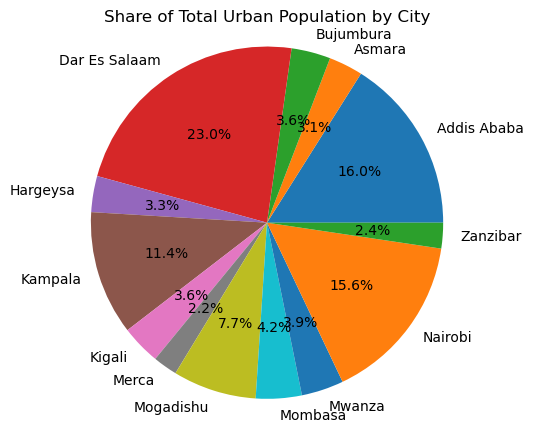

In [21]:
country_population = east_africa_df.groupby('City')['Population (2024)'].sum()
plt.figure(figsize=(5, 5))
plt.pie(country_population, labels=country_population.index, autopct='%1.1f%%')
plt.title('Share of Total Urban Population by City')
plt.axis('equal')
plt.show()


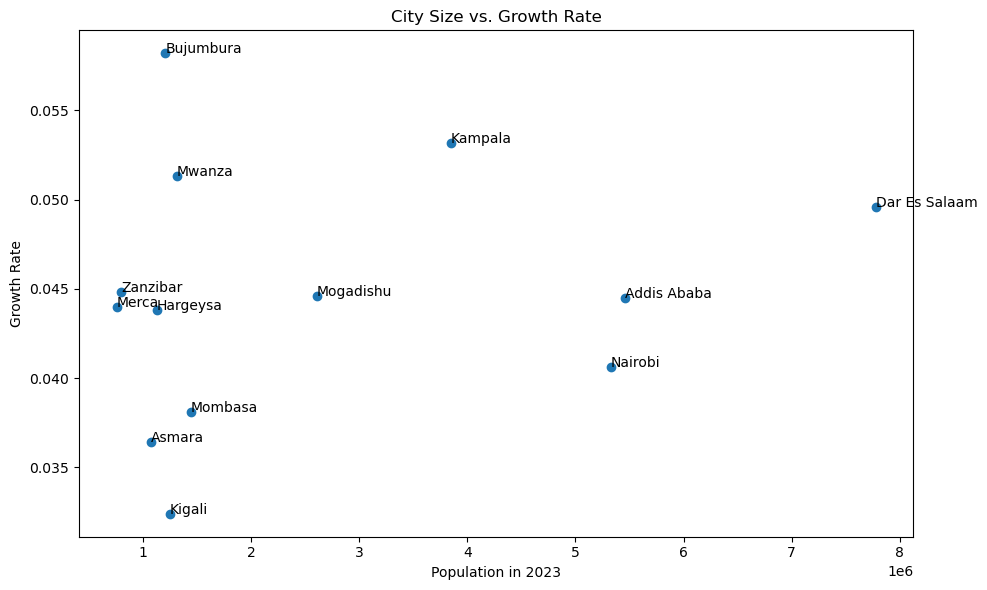

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(east_africa_df['Population (2023)'], east_africa_df['Growth Rate'])
plt.title('City Size vs. Growth Rate')
plt.xlabel('Population in 2023')
plt.ylabel('Growth Rate')
for i, txt in enumerate(east_africa_df['City']):
    plt.annotate(txt, (east_africa_df['Population (2023)'].iloc[i], east_africa_df['Growth Rate'].iloc[i]))
plt.tight_layout()
plt.show()

C:\Users\Randell\AppData\Local\Temp\ipykernel_31820\2110359806.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_africa_df.loc[:, 'Projected Population (2025)'] = east_africa_df.apply(project_population, axis=1)


<Figure size 1200x600 with 0 Axes>

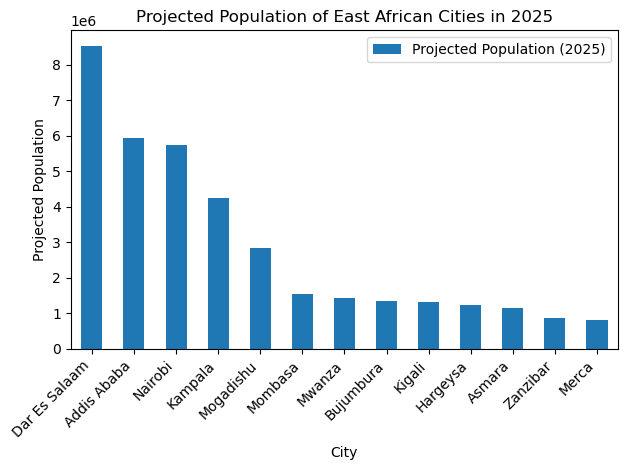

In [23]:
from sklearn.linear_model import LinearRegression

def project_population(row):
    X = [[2023], [2024]]
    y = [row['Population (2023)'], row['Population (2024)']]
    model = LinearRegression().fit(X, y)
    return model.predict([[2025]])[0]

east_africa_df.loc[:, 'Projected Population (2025)'] = east_africa_df.apply(project_population, axis=1)

plt.figure(figsize=(12, 6))
east_africa_df.sort_values('Projected Population (2025)', ascending=False).plot(x='City', y='Projected Population (2025)', kind='bar')
plt.title('Projected Population of East African Cities in 2025')
plt.xlabel('City')
plt.ylabel('Projected Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
